<a href="https://colab.research.google.com/github/xayron/ML-examples/blob/master/Word_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from platform import python_version
print(python_version())

# check for python version, if < 3, then upgrade to python 3

3.6.9


In [0]:
import tensorflow as tf
tf.__version__

# import tensorflow and check version (should be > 2.x)
# if version < 1.x use
# tf.enable_eager_execution()

'2.2.0'

In [0]:
# install tensorflow datasets

!pip install -q tensorflow-datasets

In [0]:
#import tensorflow datasets and initialize imdb dataset

import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

In [0]:
# split the dataset into train and test
# 25k train and test

import numpy as np

train_data, test_data = imdb['train'], imdb['test']

In [0]:
# Define list containing sentences and lables

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

## iterate over training and testing data extracting sentences and lables

# str(s.tomumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

for s,l in train_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

In [0]:
# turning lables to numpy arrays

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [0]:
## Tokenizing code

vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "*OOV*"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Create tokenizer
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# Fit tokenizer on training set
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# After having word index replace the strings containing words with tokens created for them
sequences = tokenizer.texts_to_sequences(training_sentences)

# Pad the sequences to make them of equal length
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

# Repeat with training set, the word index is however the one created from the training set
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

In [0]:
# Helper function to return words based on index

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[3]))
print(training_sentences[3])

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? b'this is the kind of film for a snowy sunday afternoon when the rest of the world can go ahead with its own business as you *OOV* into a big arm chair and *OOV* for a couple of hours wonderful performances from cher and nicolas cage as always gently row the plot along there are no *OOV* to cross no dangerous waters just a warm and witty *OOV* through new york life at its best a family film in every sense and one that deserves the praise it received '
b'This is the kind of film for a snowy Sunday afternoon when the rest of the world can go ahead with its own business as you descend into a big arm-chair and mellow for a couple of hours. Wonderful performances from Cher and Nicolas Cage (as always) gently row the plot along. There are no rapids to cross, no dangerous waters, just a warm and witty paddle through New York life at its best. A family film in every sense and one that deserves the praise it received.'


In [0]:
## Defining the neural network

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length), # Key to text sentimental analysis in tensorflow
    tf.keras.layers.Flatten(), # or use tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length), # Key to text sentimental analysis in tensorflow
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
# Compile model and print summery
# Compiled both model for comparision

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

print('\n')

model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 11526     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________
None


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           160000    
___________________

In [0]:
num_epochs = 10
model.fit(
    padded, # training data
    training_labels_final, # training label
    epochs=num_epochs, # epochs
    validation_data=(testing_padded, testing_labels_final) # validation data
    )

Epoch 1/10
782/782 [==============================] - 4s 5ms/step - loss: 0.4840 - accuracy: 0.7478 - val_loss: 0.2983 - val_accuracy: 0.8772
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 0.2464 - accuracy: 0.9040 - val_loss: 0.2789 - val_accuracy: 0.8828
Epoch 3/10
782/782 [==============================] - 4s 6ms/step - loss: 0.1102 - accuracy: 0.9690 - val_loss: 0.3109 - val_accuracy: 0.8798
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0306 - accuracy: 0.9953 - val_loss: 0.3525 - val_accuracy: 0.8791
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0076 - accuracy: 0.9995 - val_loss: 0.3968 - val_accuracy: 0.8786
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.4311 - val_accuracy: 0.8805
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4620 - val_accuracy: 0.8806
Epoch 

In [0]:
# Get result of embedding layer

e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [0]:
# Write Vector and Metadat auto files

import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n") #Write out the words
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n") # Write out the value of each of items in the array of embeddings, i.e. co-efficeint of each dimension of the vector for a word 
out_v.close()
out_m.close()

In [0]:
# Download the files to project from colab

try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

# **Visualizing the data**

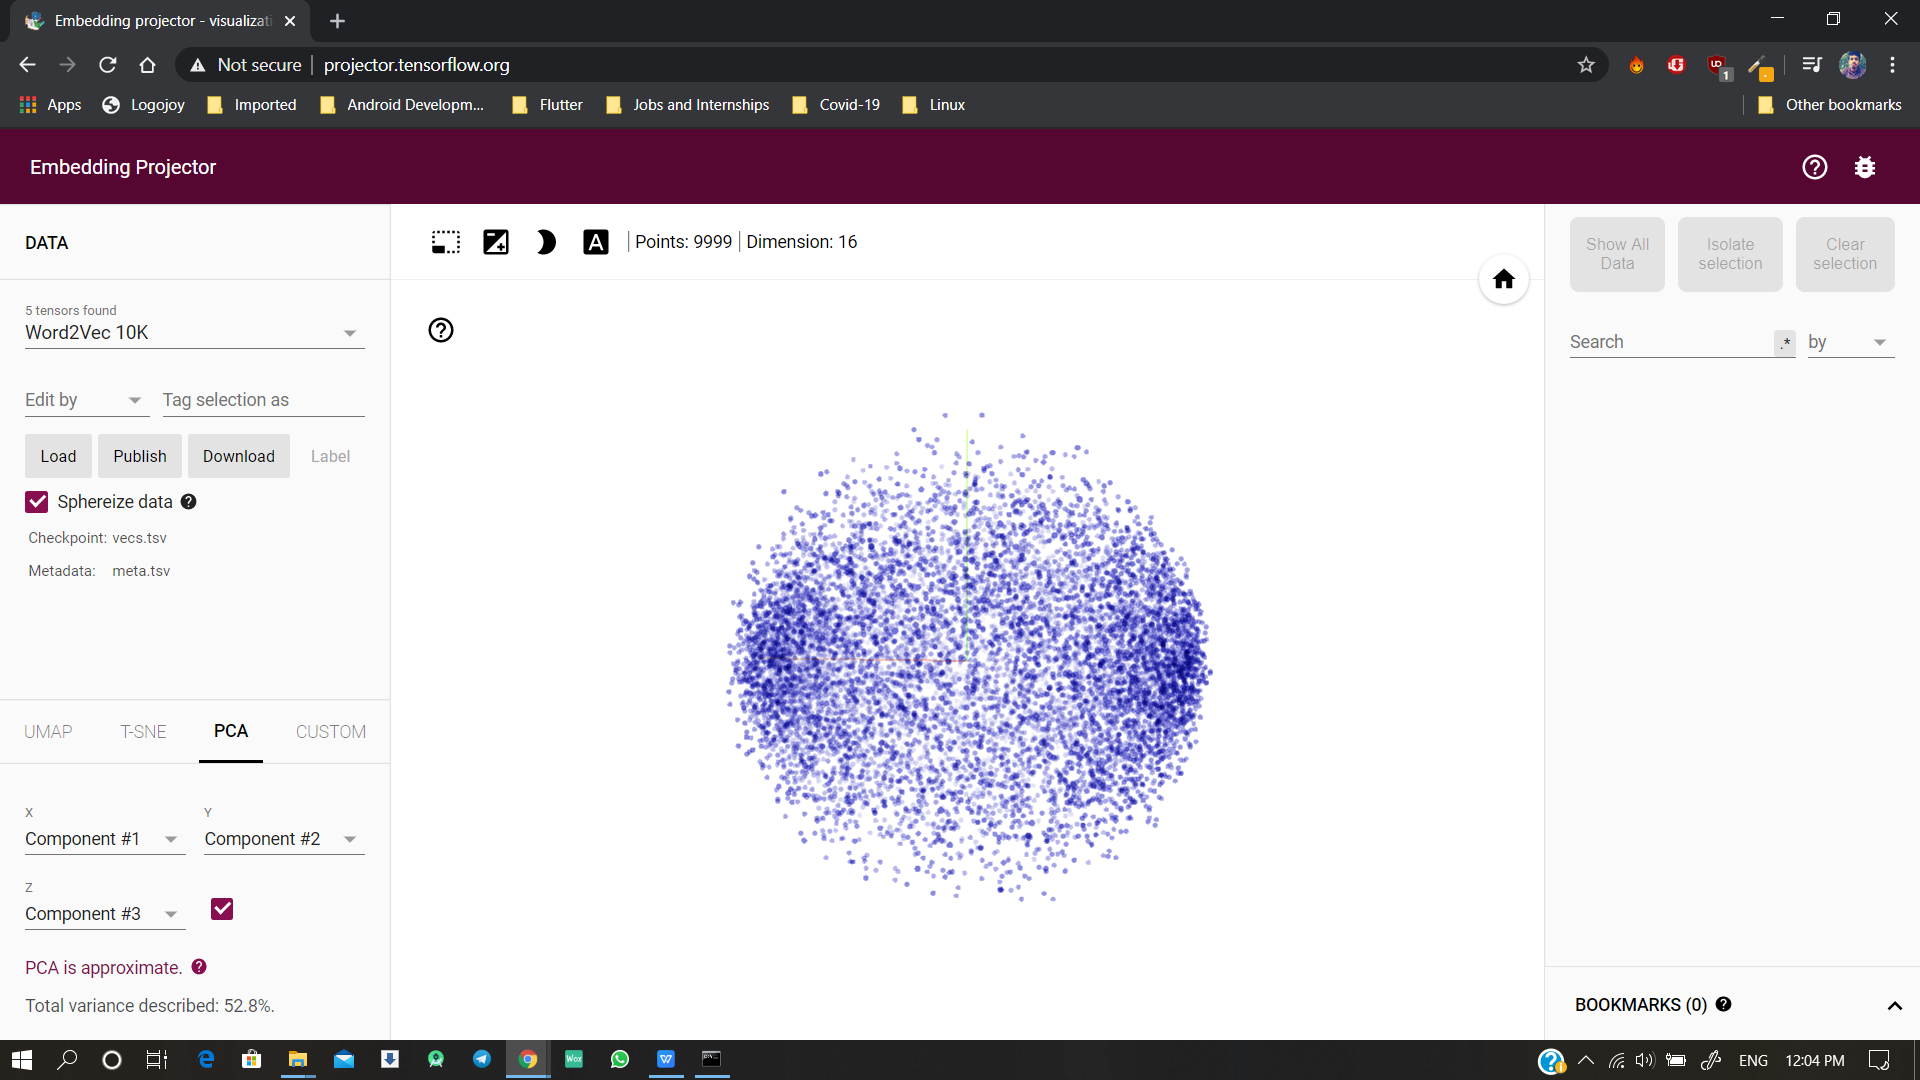